In [19]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
rootPath = os.path.split(sys.path[0])[0]
#sys.path.append(rootPath)

In [21]:
rootPath in sys.path

True

In [2]:
def load_data(rootPath, filename):
    data_df = pd.read_csv(os.path.join(rootPath, filename))
    data_df.sales_datetime = pd.to_datetime(data_df.sales_datetime, format='%Y-%m-%d', utc=True)
    data_df.set_index('sales_datetime', inplace=True)
    return data_df

In [3]:
TRAIN_FILENAME = 'data/interim/train_data_90_perc_value_v1_3.csv'
train_data = load_data(rootPath, TRAIN_FILENAME)

**Distribution of target variable**

<AxesSubplot:ylabel='Frequency'>

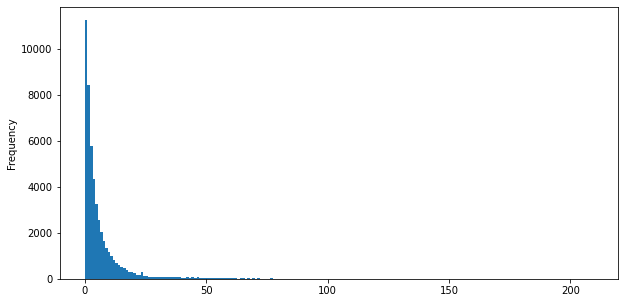

In [4]:
train_data.sales_qty.plot(kind='hist', bins=200, figsize=(10,5))

**Items price distribution**

<AxesSubplot:ylabel='Frequency'>

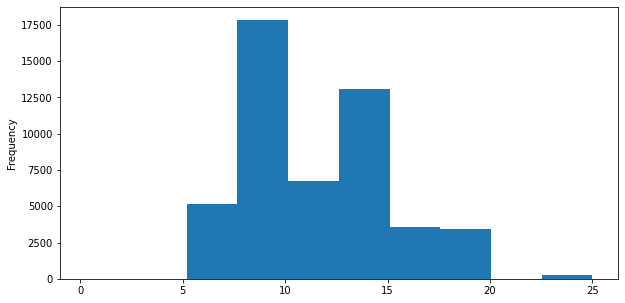

In [6]:
train_data.item_price.plot(kind='hist', bins=10, figsize=(10,5))

**Check items contribution in percentage of sales (pcs) and value (pcs * item_price)**

In [7]:
train_data['value'] = train_data['item_price']*train_data['sales_qty']
grouped_by_item = train_data.groupby('item_name').agg({'sales_qty':['sum','mean'],
                                                       'value':'sum'})
grouped_by_item.columns = ['total_sales','average_sales','total_value']
overall_value = sum(grouped_by_item.total_value)
overall_sales = sum(grouped_by_item.total_sales)
grouped_by_item['percentage_value'] = (grouped_by_item['total_value'] / overall_value)*100
grouped_by_item['percentage_sales'] = (grouped_by_item['total_sales'] / overall_sales)*100

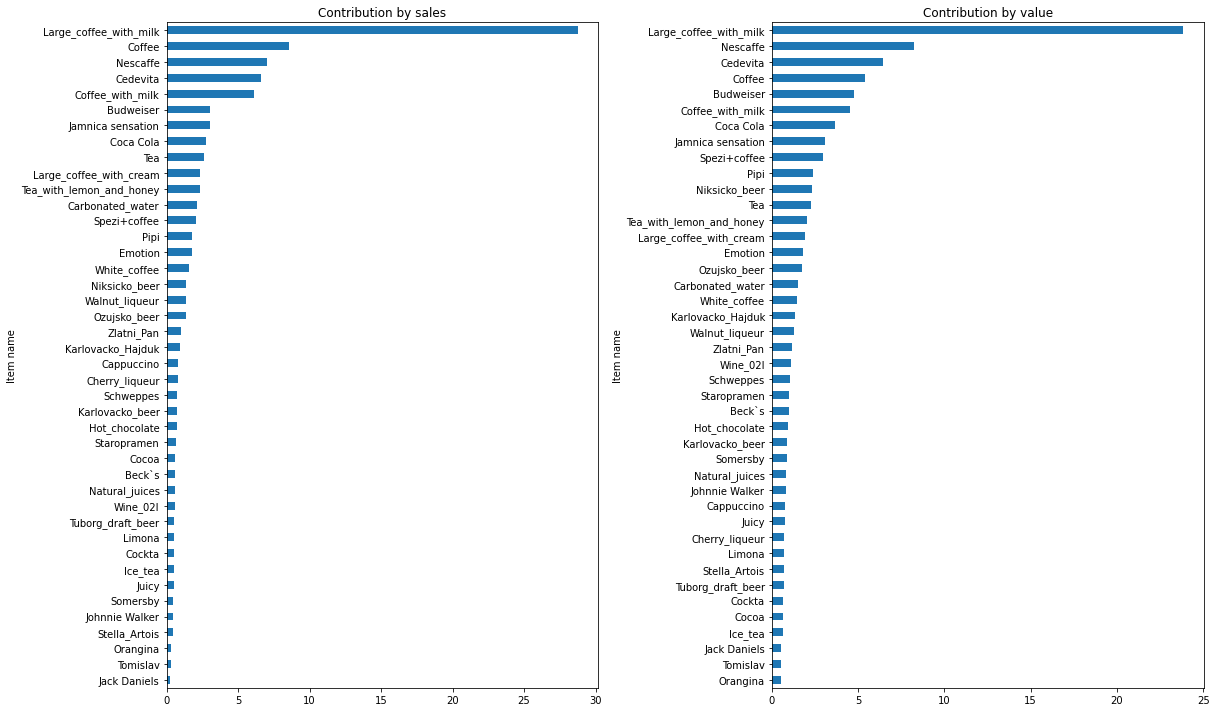

In [12]:
sorted_by_sales = grouped_by_item.sort_values(by='percentage_sales', ascending=True)
sorted_by_value = grouped_by_item.sort_values(by='percentage_value', ascending=True)

fig, axs = plt.subplots(nrows=1, 
                        ncols=2, 
                        tight_layout=True, 
                        figsize = (17, 10))

sorted_by_sales.percentage_sales.plot(kind='barh', xlabel='Item name', ax=axs[0], title='Contribution by sales')
sorted_by_value.percentage_value.plot(kind='barh', xlabel='Item name', ax=axs[1], title='Contribution by value')

plt.show()

**Some weird cases, probably canceled bills**

In [15]:
train_data[train_data.item_price < 1.0]

,item_name,item_price,sales_qty,value
sales_datetime,,,,
2018-03-01 00:00:00+00:00,Emotion,0.250000,2.0,0.500000
2018-03-02 00:00:00+00:00,Emotion,0.500000,3.0,1.500000
2018-03-03 00:00:00+00:00,Emotion,0.333333,4.0,1.333333
2018-03-04 00:00:00+00:00,Emotion,0.472222,8.0,3.777778
2018-03-05 00:00:00+00:00,Emotion,0.500000,1.0,0.500000
2018-03-06 00:00:00+00:00,Emotion,0.500000,1.0,0.500000
2018-03-07 00:00:00+00:00,Emotion,0.500000,2.0,1.000000
2018-03-08 00:00:00+00:00,Emotion,0.500000,3.0,1.500000
2018-03-02 00:00:00+00:00,Wine_02l,0.500000,1.0,0.500000
